# Exploratory Data Analysis

## 1. Train Data
- Data Types
- Categorical column
- Distribution price / Log_price
- Change of House Price Over Time
- Correlation between Train Data Features
- Missing Data
- Relationship between Independent Variable and Price

## 2. Macro Data
- Data type 
- Categorical Features
- Correlation between Features
- Missing data

## 3. Train vs Test data
- Comparison between Distributions of Train and Test Data

In [1]:
pd.options.display.max_columns = 300

%matplotlib inline

# 1. Train data

In [21]:
# Train data
df_train = pd.read_csv('../input/train.csv', index_col=0 ,parse_dates=['timestamp'])
print("df_train size's shape: ", df_train.shape)
df_train.tail(2)

df_train size's shape:  (30471, 291)


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,c

# Data Types

In [22]:
df_dtype = df_train.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,datetime64[ns],1
1,int64,156
2,float64,119
3,object,15


We can see that there are 15 object features. Let's take a closer look. Theare might be some numeric features which has no quantitative meaning such as like ID. So I have to take a look at every single feature and understand what they mean

## categorical column
- "procuct_type"
    - Investment
    - OwnerOccupier
- "sub_area" column has 146 different sub-area names.
- Features have yes/no value
    - culture_objects_top_25
    - thermal_power_plant_raion
    - incineration_raion
    - oil_chemistry_raion
    - radiation_raion
    - railroad_terminal_raion
    - big_market_raion
    - nuclear_reactor_raion
    - detention_facility_raion
    - water_1line
    - big_road1_1line
    - railroad_1line
- "ecology" has 5 different condition values.
    - good
    - excellent
    - poor
    - satisfactory
    - no data
- "material" has 7 unique values
- ID_* : an numeric ID; no quantitative meaning
    - ID_metro
    - ID_railroad_station_walk
    - ID_big_road1
    - ID_big_road2
    - ID_railroad_terminal
    - ID_bus_terminal

# Distribution price / log_price

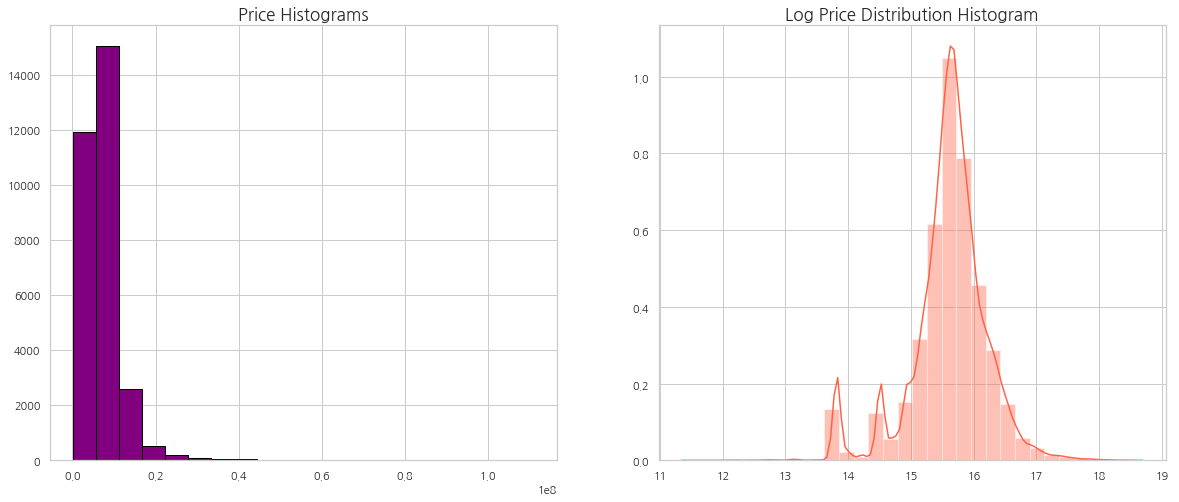

In [7]:
# price histogram -> right skewed 
def price_histogram():
    fig,ax = plt.subplots(1,2, figsize=(20,8))
    ax1,ax2 = ax.flatten()

    df_train.price_doc.plot.hist(bins=20, color='Purple', edgecolor='black', ax=ax1);
    ax1.set_title('Price Histograms', fontsize=17)
    ax1.set_ylabel('')
    ax1.set_xlabel('')

    log_price = np.log(df_train.price_doc)
    sns.distplot(log_price,  bins=30, color='tomato', kde=True, ax=ax2)
    ax2.set_title("Log Price Distribution Histogram", fontsize=17)
    ax2.set_ylabel("")
    ax2.set_xlabel('')
    plt.subplots_adjust(wspace=0.2);

price_histogram()

Log price looks more like a normal distribution. 

# Change of House Price Over Time

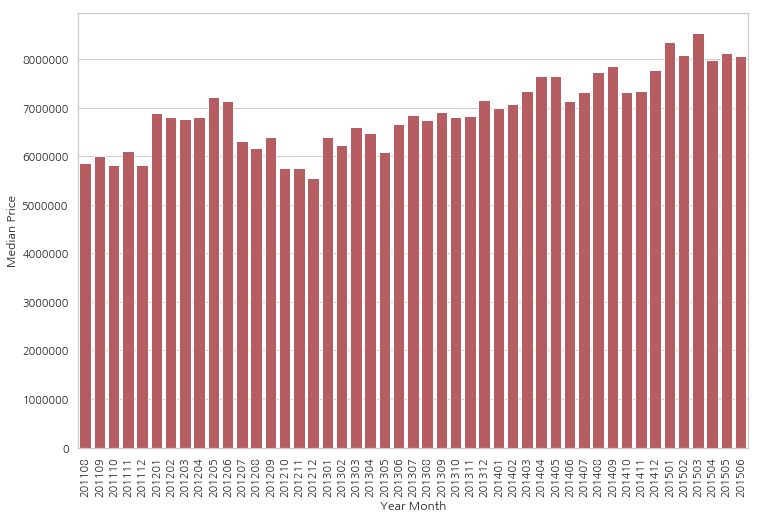

In [6]:
df_train['yearmonth'] = df_train['timestamp'].map(lambda x: str(x)[:4] + str(x)[5:7])
grouped_df = df_train.groupby('yearmonth')['price_doc'].aggregate(np.mean).reset_index()
plt.figure(figsize=(12, 8))
plt.ylabel('Median Price', fontsize=12)
plt.xlabel('Year Month', fontsize=12)
plt.xticks(rotation='vertical')
sns.barplot(grouped_df.yearmonth.values, grouped_df.price_doc.values, color='r')
plt.show()
df_train = df_train[df_train.columns.drop('yearmonth')]

# Correlation between Train Data Features

Text(0.5, 1.0, 'correlation')

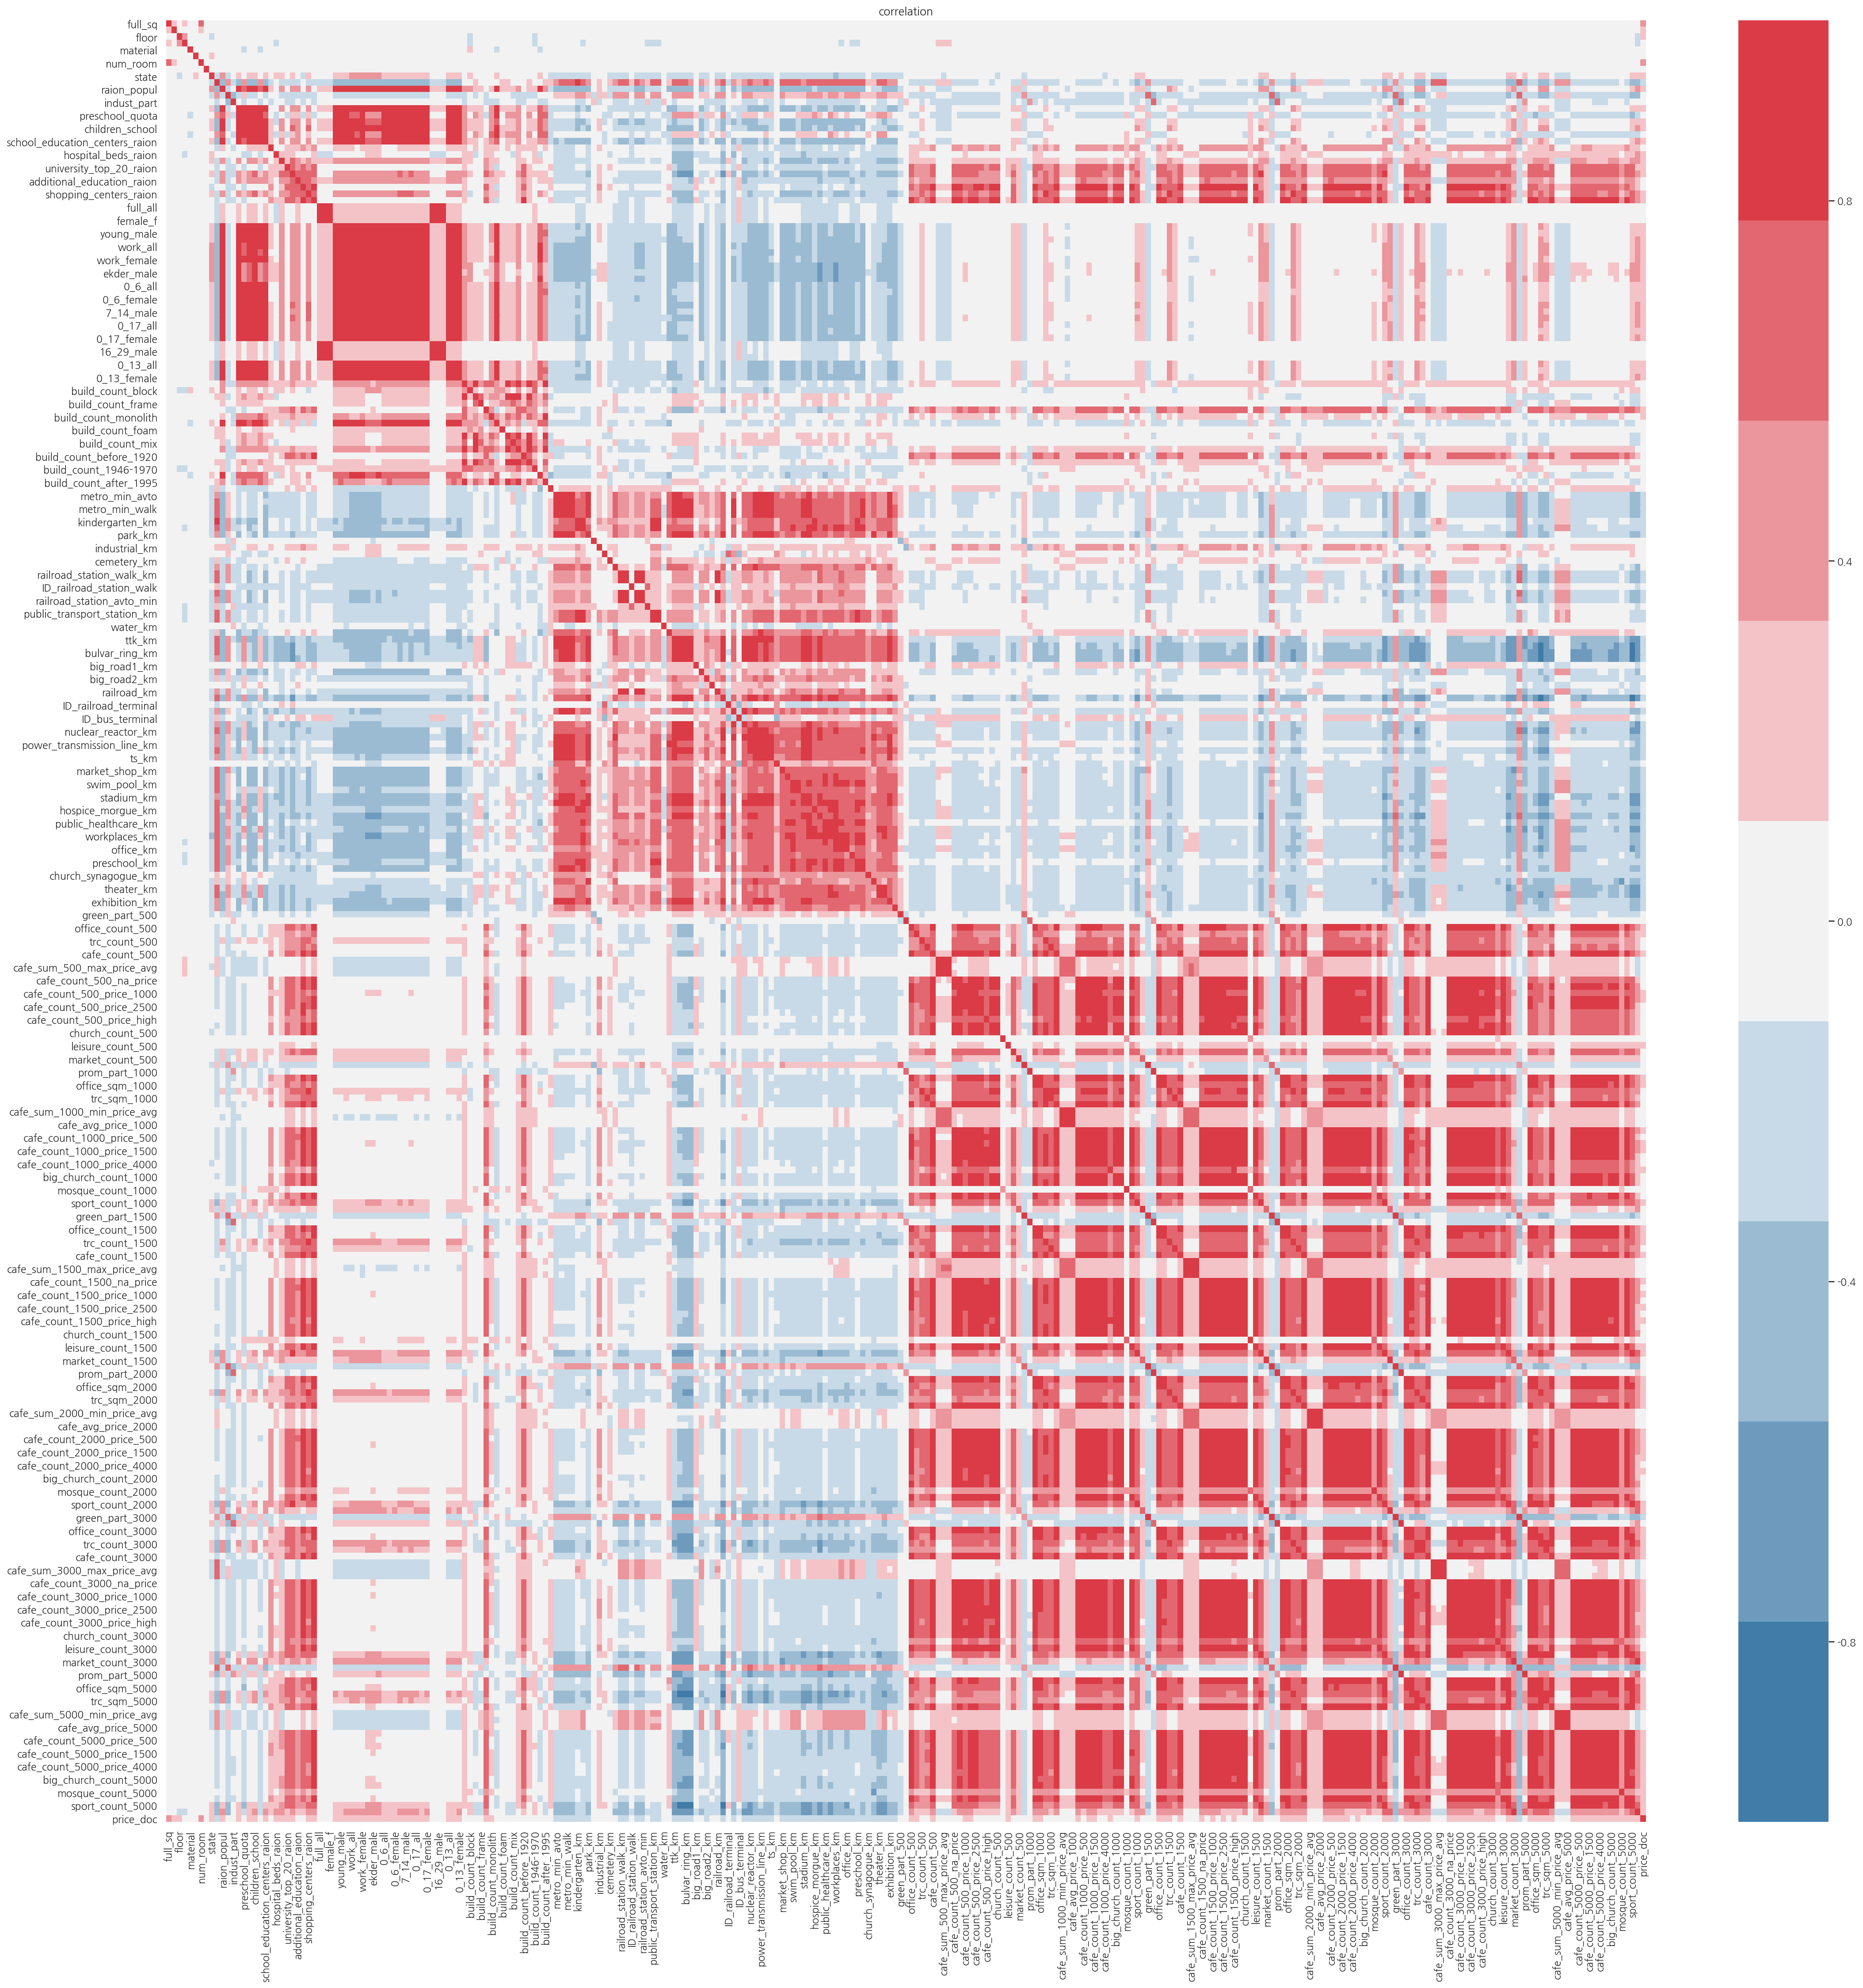

In [27]:
# df_train = df_train.select_dtypes(include=['int64', 'float64'])

# corr = df_train.corr()
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
# mask[np.diag_indices_from(mask)] = False 

# plt.figure(figsize=(17, 17))
# # cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap = sns.diverging_palette(240, 10, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

cmap = sns.diverging_palette(240, 10, n=9)

fig  = plt.figure(figsize=(36, 36), dpi=150)
axes1 = fig.add_subplot(111)
sns.heatmap(df_train.corr(), cmap=cmap, ax=axes1, vmin=-1, vmax=1)
plt.title('correlation')

It shows that the independent variables of high correlation are grouped around.

# Missing Data 

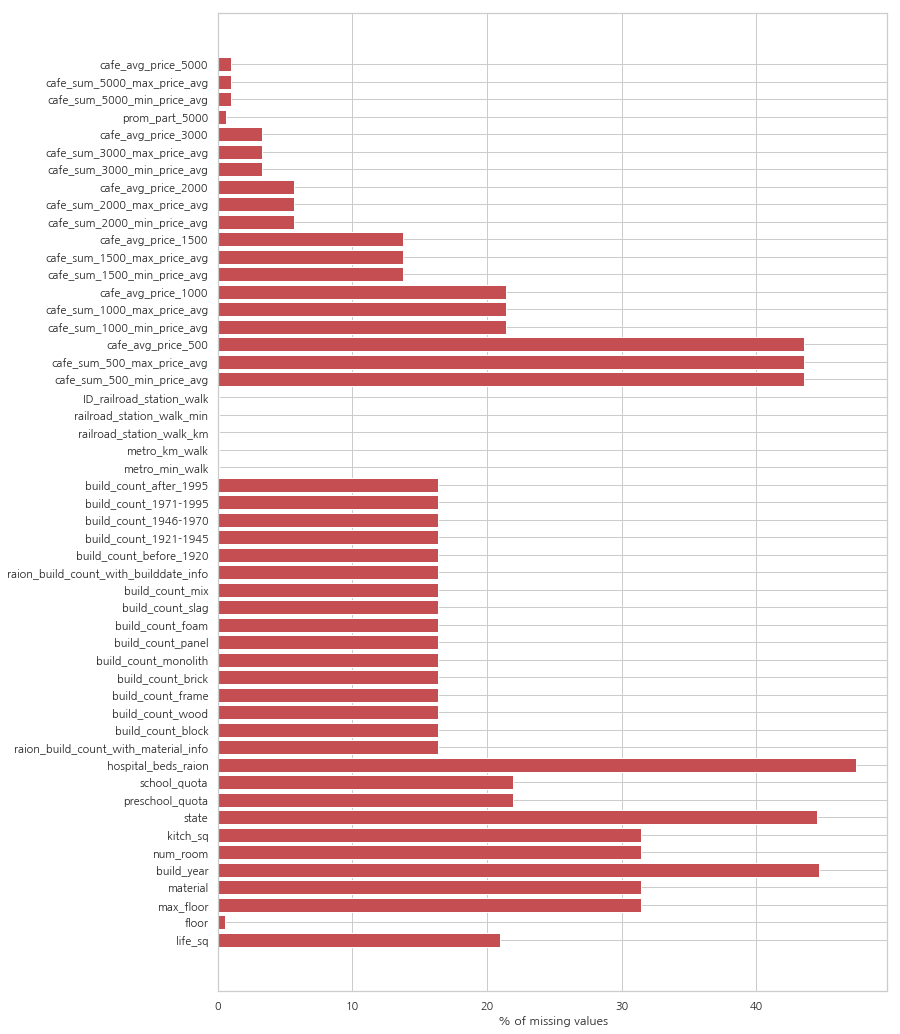

In [8]:
df_missing = df_train.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.loc[df_missing['missing_count']>0]
ind = np.arange(df_missing.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, (df_missing.missing_count.values/len(df_train))*100, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("% of missing values")
plt.show()

We can see the independent variables where the data are partially empty.

# Relationship between Independent Variable and Price

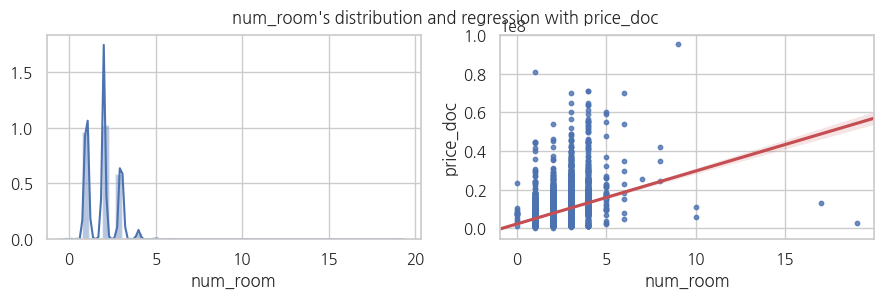

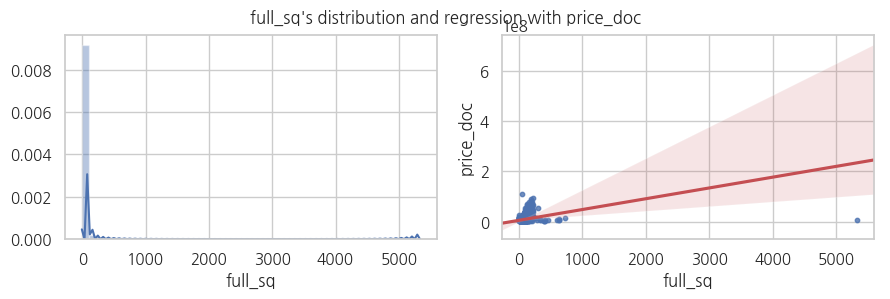

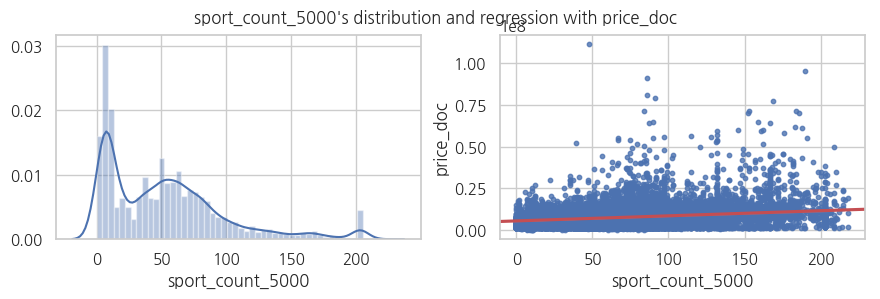

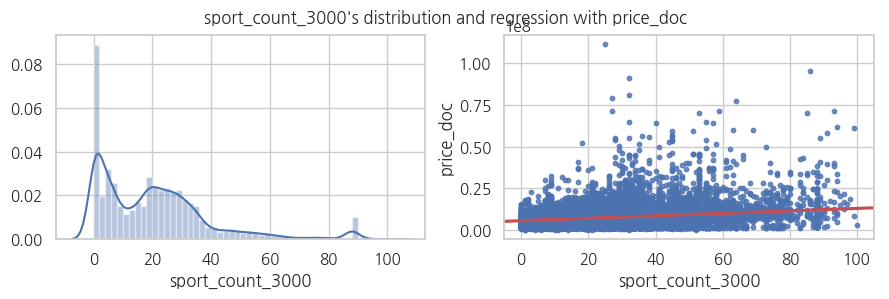

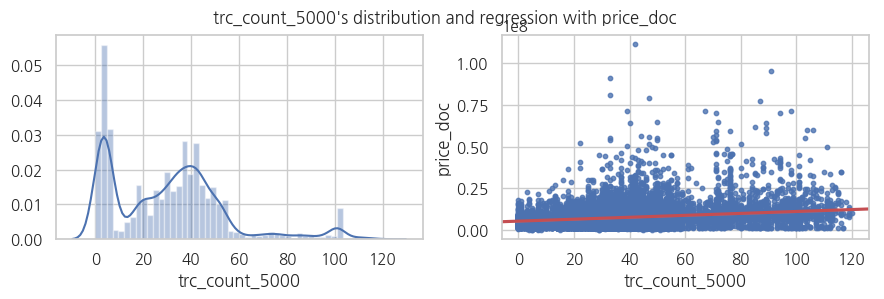

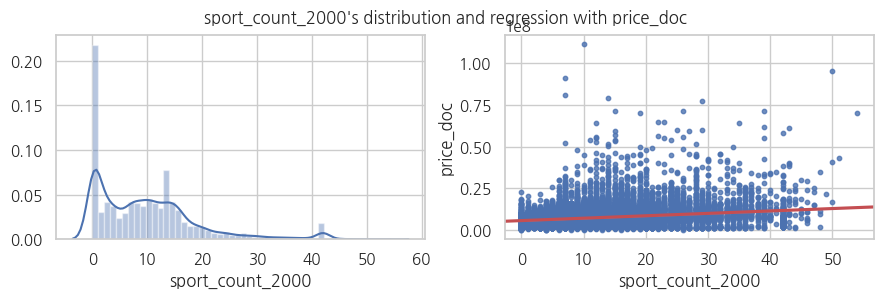

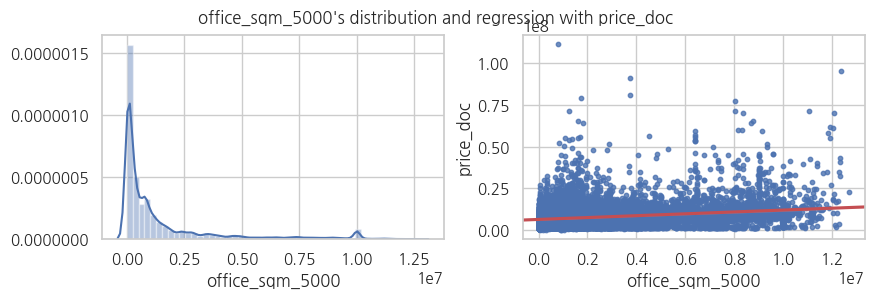

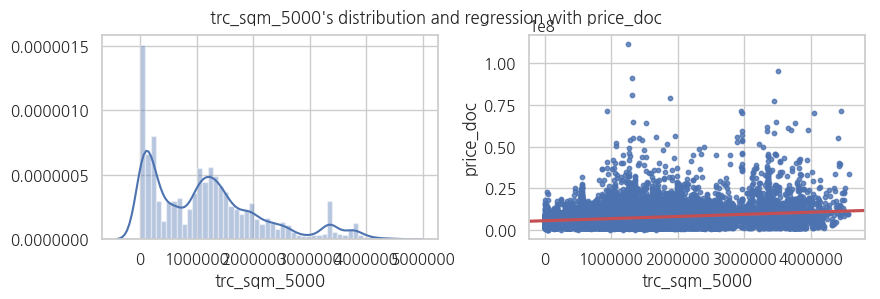

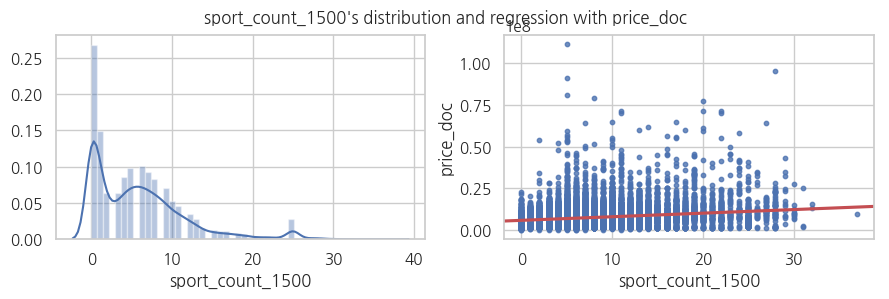

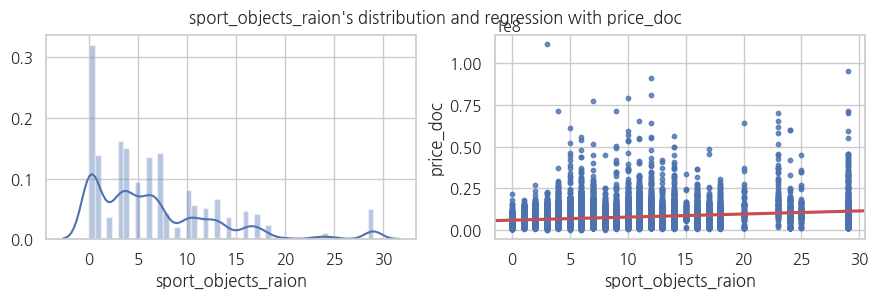

In [9]:
corrs = sorted([(df_train['price_doc'].corr(df_train[f]), f) for f in df_train._get_numeric_data().columns.drop('price_doc')], reverse=True)[:10]
features = [f[1] for f in corrs]

for f in features:
    fig  = plt.figure(figsize=(9, 3), dpi=100)
    fig.suptitle("{}'s distribution and regression with price_doc".format(f))

    axes1 = fig.add_subplot(121)
    axes2 = fig.add_subplot(122) 
    sns.distplot(df_train[f].dropna(), ax=axes1)
    sns.regplot(x=f, y='price_doc', data=df_train[[f, 'price_doc']], ax=axes2, scatter_kws={"s": 10, "color":"b"}, line_kws={"color":"r"})
    fig.tight_layout()
    plt.show()

# categorical feature
- product_type
- ecology
- material

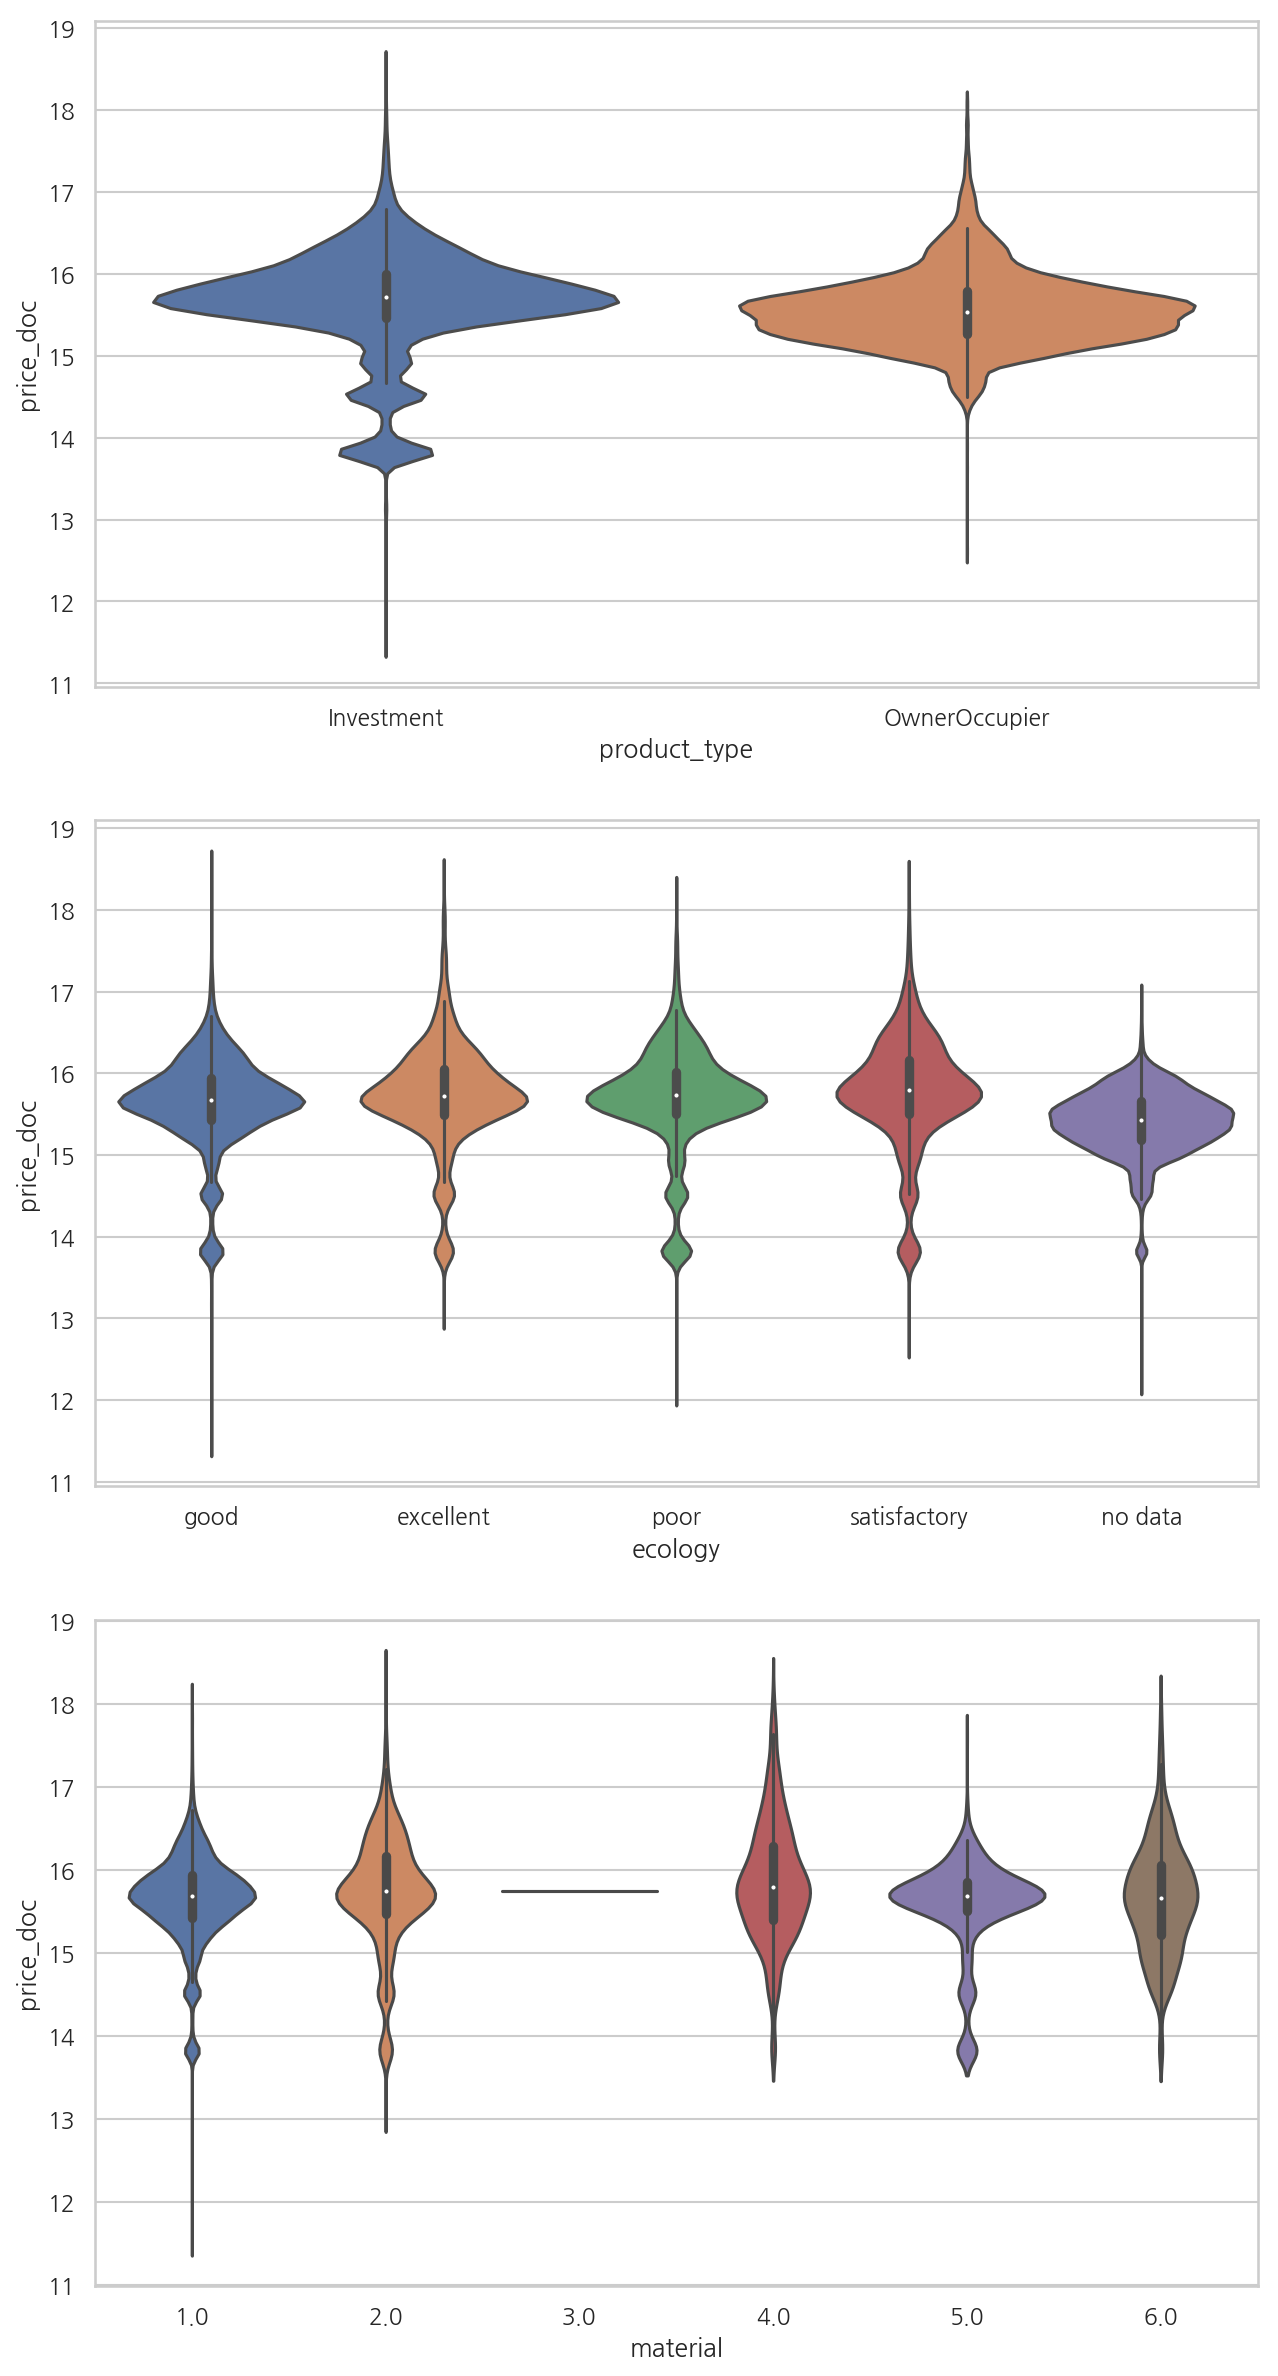

In [29]:
fig  = plt.figure(figsize=(10, 20), dpi=150)
axes1 = fig.add_subplot(311)
axes2 = fig.add_subplot(312)
axes3 = fig.add_subplot(313)
sns.violinplot(df_train['product_type'], np.log(df_train['price_doc']), ax=axes1)
sns.violinplot(df_train['ecology'], np.log(df_train['price_doc']), ax=axes2)
sns.violinplot(df_train['material'], np.log(df_train['price_doc']), ax=axes3)

# 2. Macro data

In [31]:
df_macro = pd.read_csv('../input/macro.csv', parse_dates=['timestamp'])
print("macro size's shape: ", df_macro.shape)
df_macro.tail(2)

macro size's shape:  (2484, 100)


,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,invest_fixed_capital_per_cap,invest_fixed_assets,profitable_enterpr_share,unprofitable_enterpr_share,share_own_revenues,overdue_wages_per_cap,fin_res_per_cap,marriages_per_1000_cap,divorce_rate,construction_value,invest_fixed_assets_phys,pop_natural_increase,pop_migration,pop_total_inc,childbirth,mortality,housing_fund_sqm,lodging_sqm_per_cap,water_pipes_share,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,69.179,51.68,-0.408111,80804.3,-0.037267,6.2,7.71,986.94,1969.11,132.88,313.21,23453188,0.016931,NaN,899539,0.382095,12.66,NaN,NaN,NaN,NaN,NaN,NaN,20354.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.76,99.65,69.81,50.2,45.71,38.4,29.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2483,2016-10-19,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,69.179,51.68,-0.408111,80804.3,-0.037267,6.2,7.71,990.65,1966.45,133.15,313.21,23453188,0.016931,NaN,899539,0.382095,12.66,NaN,NaN,NaN,NaN,NaN,NaN,20354.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.76,99.65,69.81,50.2,45.71,38.4,29.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data types

In [32]:
df_dtype = df_macro.dtypes.reset_index()
df_dtype.columns = ['Count', 'Column Type']
df_dtype.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,datetime64[ns],1
1,int64,2
2,float64,94
3,object,3


## Categorical Features
- child_on_acc_pre_school
- "modern_education_share"
- old_education_build_share

In [33]:
print(df_macro['child_on_acc_pre_school'].unique())
print(df_macro['modern_education_share'].unique())
print(df_macro['old_education_build_share'].unique())

['45,713' '#!' '7,311' '3,013' '16,765' nan]
[nan '90,92' '93,08' '95,4918']
[nan '23,14' '25,47' '8,2517']


It looks like the data recorded wrong.

## Correlation between Features

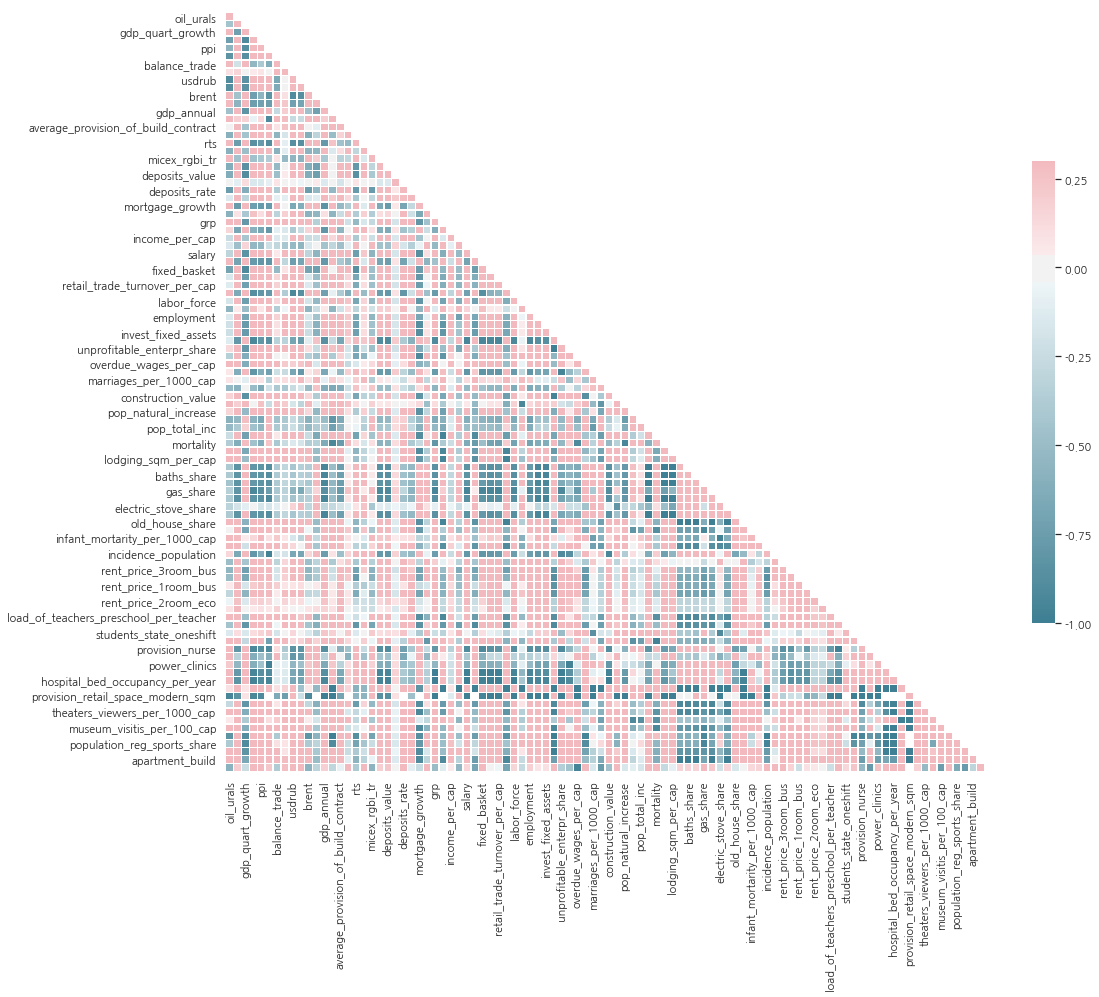

In [16]:
corr = df_macro.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False 

plt.figure(figsize=(17, 17))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# missing data

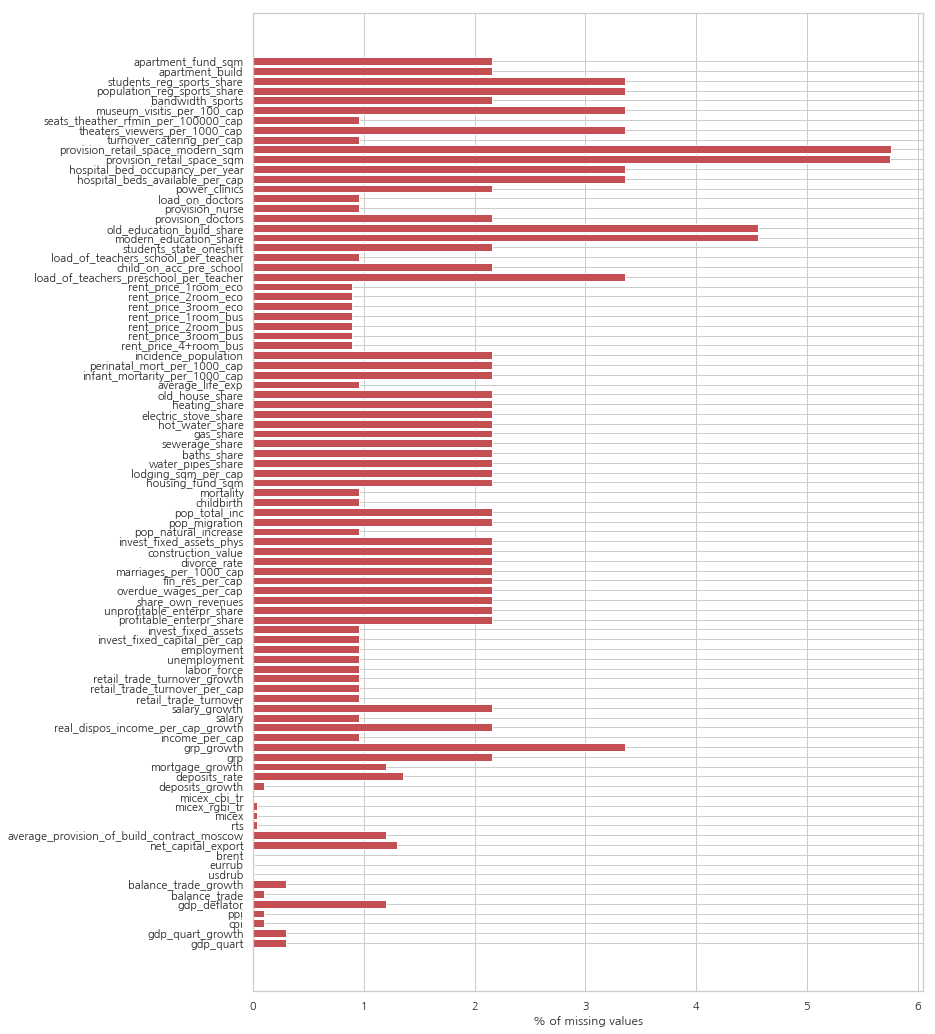

In [17]:
df_missing = df_macro.isnull().sum(axis=0).reset_index()
df_missing.columns = ['column_name', 'missing_count']
df_missing = df_missing.loc[df_missing['missing_count']>0]
ind = np.arange(df_missing.shape[0])
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, (df_missing.missing_count.values/len(df_train))*100, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(df_missing.column_name.values, rotation='horizontal')
ax.set_xlabel("% of missing values")
plt.show()

# 3. Train vs Test data
- Comparison between Distributions of Train and Test Data

In [34]:
df_test = pd.read_csv('../input/test.csv', parse_dates=['timestamp'])

In [35]:
corrs = sorted([(df_train['price_doc'].corr(df_train[f]), f) for f in df_train._get_numeric_data().columns.drop('price_doc')], reverse=True)[:10]
features = [f[1] for f in corrs]

# Comparison between Distributions of Train and Test Data

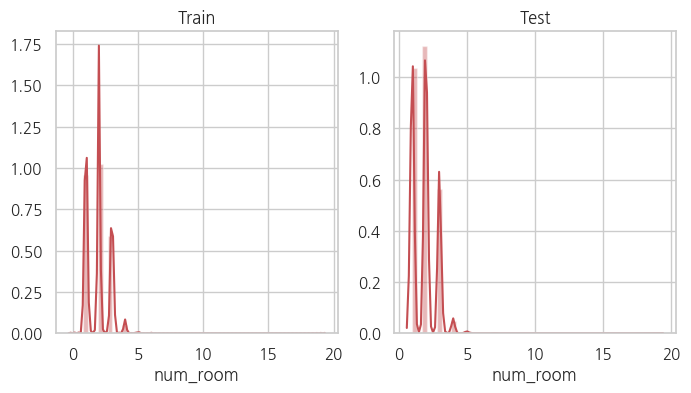

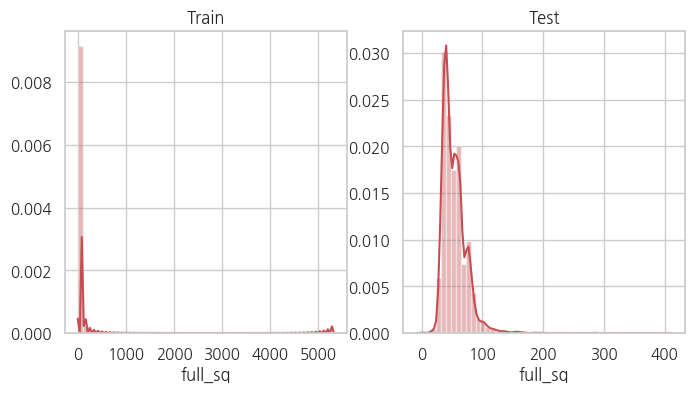

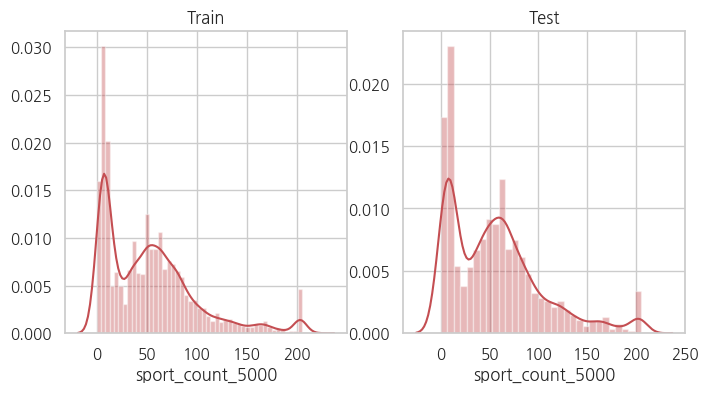

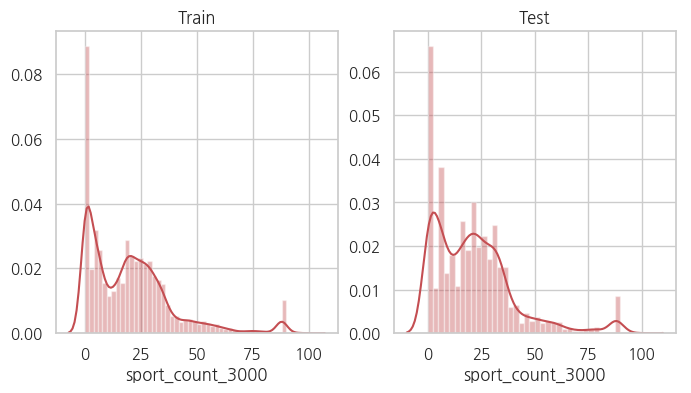

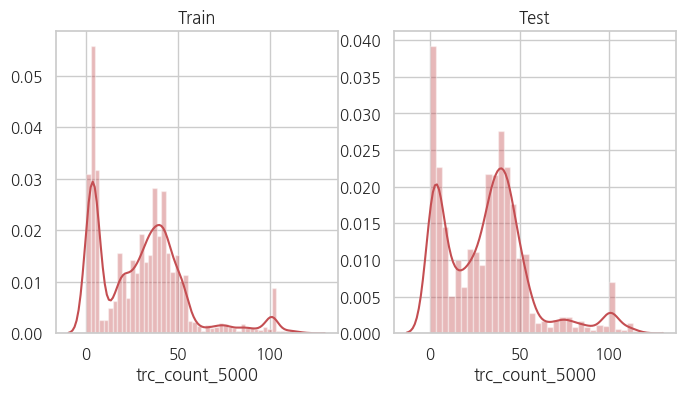

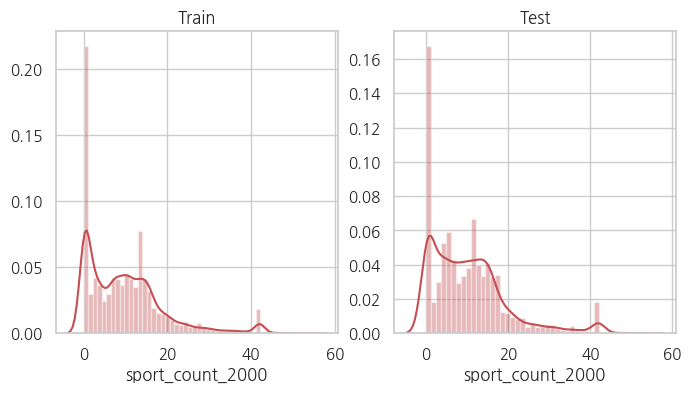

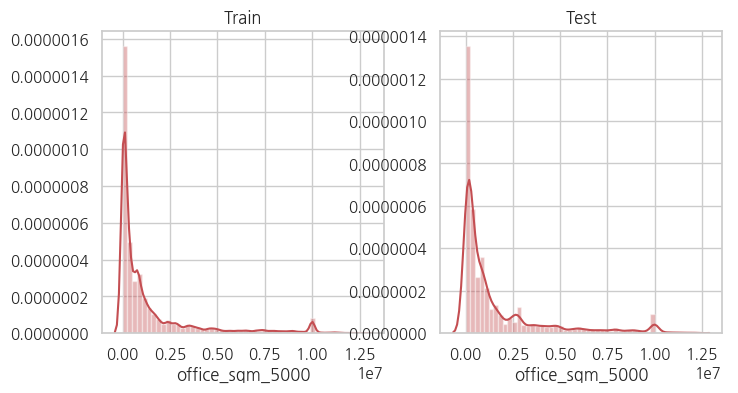

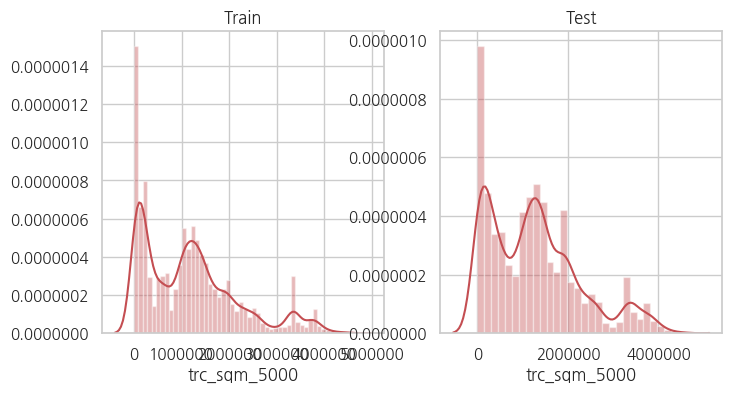

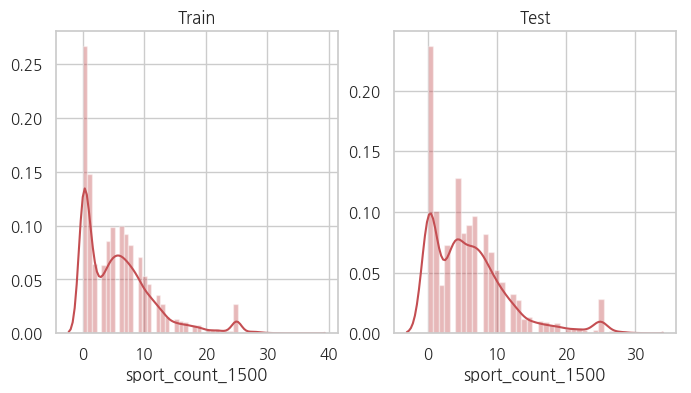

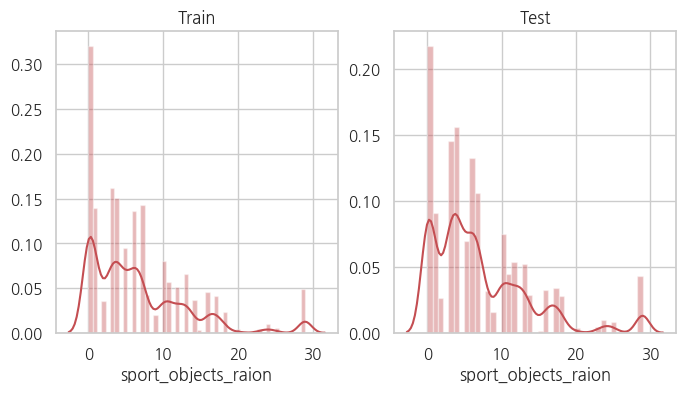

In [36]:
for f in features:
    fig = plt.figure(figsize=(8, 4), dpi=100)
    axes1 = fig.add_subplot(121)
    sns.distplot(df_train[f].dropna(), ax=axes1, color="r")
    axes2 = fig.add_subplot(122)
    sns.distplot(df_test[f].dropna(), ax=axes2, color="r")
    axes1.set_title("Train")
    axes2.set_title("Test")

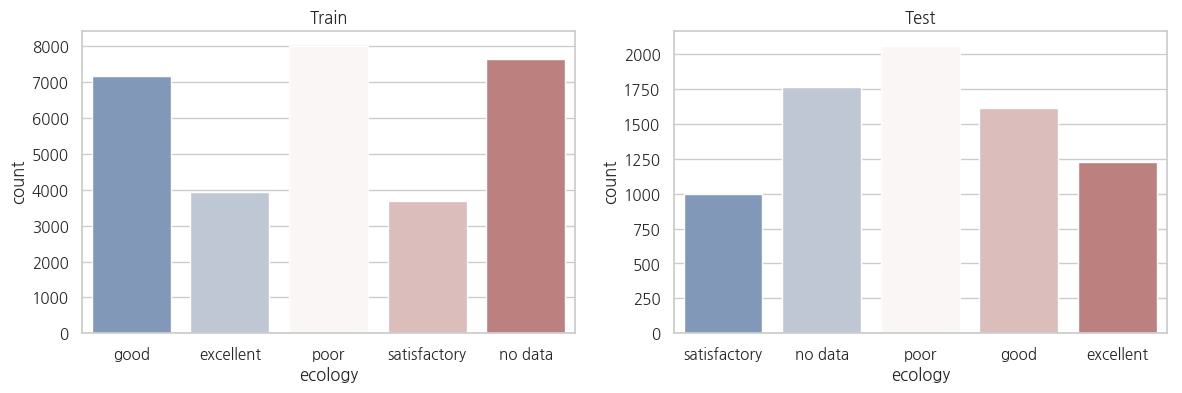

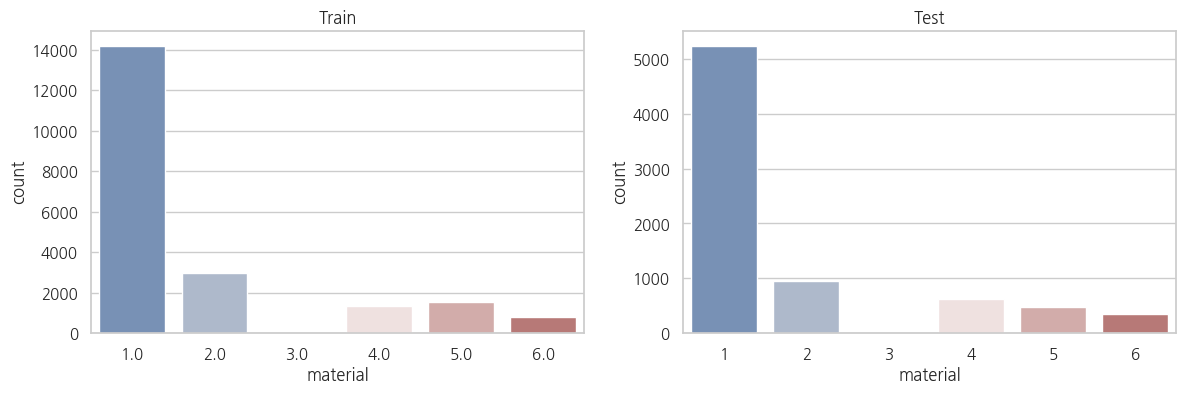

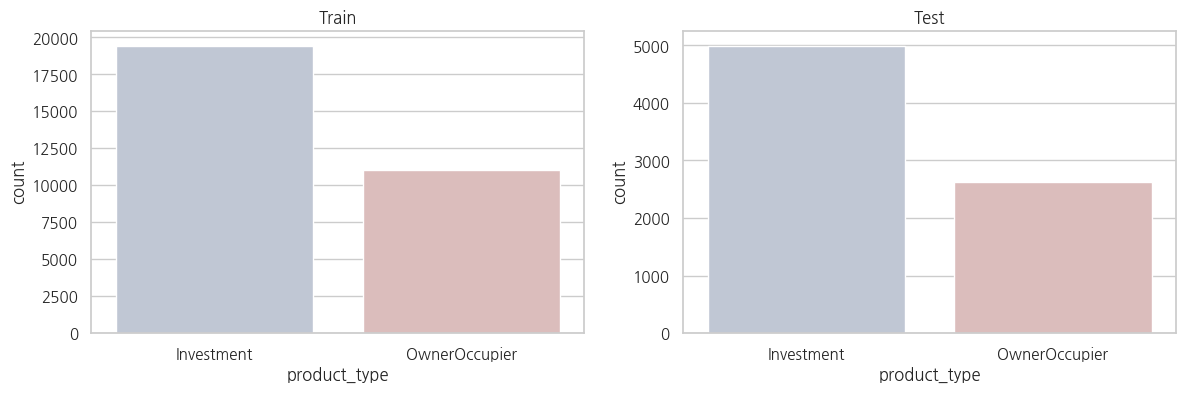

In [37]:
for cf in ['ecology', 'material', 'product_type']:
    fig = plt.figure(figsize=(14, 4), dpi=100)
    
    axes1 = fig.add_subplot(121)
    sns.countplot(df_train[cf].dropna(), ax=axes1, palette="vlag")

    axes2 = fig.add_subplot(122)
    sns.countplot(df_test[cf].dropna(), ax=axes2, palette="vlag")

    axes1.set_title("Train")
    axes2.set_title("Test")

This shows that the distributions of train and test data are similar.